# Training Materials: Raster to Vector Conversion with Same CRS

This notebook provides training on converting raster to vector data while maintaining the Coordinate Reference System (CRS).

## I. Introduction to Raster and Vector Data

### A. Defining Raster Data

* Grid-based structure (pixels)
* Examples: satellite imagery, elevation models
* Advantages and disadvantages

### B. Defining Vector Data

* Point, line, and polygon geometries
* Examples: roads, buildings, administrative boundaries
* Advantages and disadvantages

### C. Understanding Coordinate Reference Systems (CRS)

* Importance of CRS in spatial data
* Common CRS (WGS84, UTM)
* Checking CRS in different data formats (raster and vector)

### D. Why Maintain the Same CRS?

* Preventing spatial misalignment
* Ensuring accurate analysis and visualization

## II. Tools and Libraries

**A. Import Required Libraries**

In [1]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape
import numpy as np

**B. Set Paths for Input and Output Files**

In [2]:
# --- Step 1: Load the Raster File ---
input_raster = '/home/jovyan/shared/Arissara/genAI/water_mask-Indonesia.tif'  # Replace with your raster file path
output_vector = '/home/jovyan/shared/Arissara/genAI/water_mask-Indonesia.gpkg'  # Replace with desired output path

**C. Open the Raster File**

In [3]:
with rasterio.open(input_raster) as src:
    raster = src.read(1)  # Read the first band
    transform = src.transform  # Get affine transform
    crs = src.crs  # Get Coordinate Reference System (CRS)

**D. Threshold the Raster (Optional)**

In [4]:
# --- Step 2: Optional Thresholding (Binary Mask) ---
binary_raster = raster > 0  # Example threshold: pixels > 0

**E. Vectorize the Raster**

In [5]:
# --- Step 3: Vectorize the Raster ---
# Extract polygons and their values
results = (
    {'properties': {'value': v}, 'geometry': shape(s)}
    for s, v in shapes(binary_raster.astype(np.int16), transform=transform)
)

**F. Convert Results to GeoDataFrame**

In [6]:
# Convert to a GeoDataFrame
geoms = list(results)
gdf = gpd.GeoDataFrame.from_features(geoms, crs=crs.to_string())

**G. Save the Vectorized Data**

In [10]:
# --- Step 4: Save the Vector Data ---
gdf.to_file(output_vector, driver="GPKG")  # Save as GeoPackage

# Inspect the Output ---
print(gdf.head())

                                            geometry  value
0  POLYGON ((102.06837 1, 102.06837 0.99982, 102....    1.0
1  POLYGON ((102.82931 1, 102.82931 0.99991, 102....    1.0
2  POLYGON ((102.73102 0.99946, 102.73102 0.99928...    1.0
3  POLYGON ((102.82949 0.9991, 102.82949 0.99901,...    1.0
4  POLYGON ((102.03692 0.99847, 102.03692 0.99838...    1.0


**H. Visualization (optional)**

<Axes: >

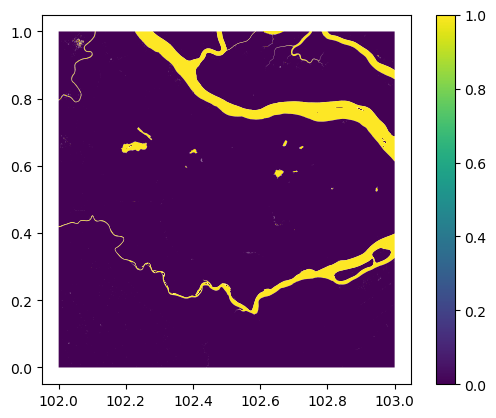

In [11]:
# Visualization (optional)
gdf.plot(column='value', cmap='viridis', legend=True)